In [1]:
import itertools
from bboxes_utils import bboxes_from_fast_rcnn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import argparse
import functools
from tqdm.auto import tqdm

os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default

import numpy as np
import tensorflow as tf

from svhn_dataset import SVHN
from svhn_anchors import AnchorsFactory
from svhn_competition import RetinaNet

In [2]:
svhn = SVHN()

Metal device set to: Apple M1 Max


In [3]:
width, height = 224, 224

In [4]:
factory = AnchorsFactory(levels=(3, 7), scales=[0.5, 1], ratios=[0.5, 1])
anchors = factory.build(height=height, width=width)

In [6]:
anchors.shape

TensorShape([4196, 4])

In [55]:
it = iter(itertools.islice(anchors, 0, None, 9))

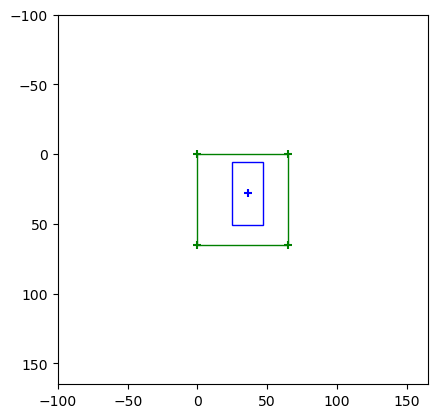

In [87]:
bbox = next(it)
f, ax =plt.subplots(1,1)
ax.set_xlim(-100., width+100)
ax.set_ylim(-100., height+100)
ax.invert_yaxis()
plt.scatter([0, width, 0, width], [0, 0, height, height], c='g', marker='+')
ax.add_patch(patches.Rectangle((0, 0), width, height, facecolor=(0, 0, 0, 0), edgecolor='g'))
plt.scatter([(bbox[3] + bbox[1]) / 2], [(bbox[2] + bbox[0]) / 2], c='b', marker='+')
ax.add_patch(patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], facecolor=(0, 0, 0, 0), edgecolor='b'))
ax.set_aspect('equal')
plt.show()

In [180]:
tf.raw_ops.UniqueV2(x=AnchorBox().get_anchors(224,224)[:, :2], axis=[0])

UniqueV2(y=<tf.Tensor: shape=(1049, 2), dtype=float32, numpy=
array([[  4.,   4.],
       [ 12.,   4.],
       [ 20.,   4.],
       ...,
       [192.,  64.],
       [ 64., 192.],
       [192., 192.]], dtype=float32)>, idx=<tf.Tensor: shape=(9441,), dtype=int32, numpy=array([   0,    0,    0, ..., 1048, 1048, 1048], dtype=int32)>)

In [153]:
ANCHOR_RATIOS

[0.5, 1.0, 2.0]

In [418]:
AnchorBox().get_anchors(224, 224)[::9]

<tf.Tensor: shape=(1049, 4), dtype=float32, numpy=
array([[  4.      ,   4.      ,  22.627417,  45.254833],
       [ 12.      ,   4.      ,  22.627417,  45.254833],
       [ 20.      ,   4.      ,  22.627417,  45.254833],
       ...,
       [192.      ,  64.      , 362.03867 , 724.07733 ],
       [ 64.      , 192.      , 362.03867 , 724.07733 ],
       [192.      , 192.      , 362.03867 , 724.07733 ]], dtype=float32)>

In [160]:
224 / np.array(rnet.sizes)

array([  8.,  16.,  32.,  56., 112.])

In [5]:
train_dataset, dev_dataset, test_dataset = build_datasets(batch_size=256, svhn=svhn, iou_threshold=0.6,
                                                          bg_iou_threshold=0.4, seed=42, anchors=anchors, augment=True,
                                                          shuffle_train=False, augment_scale=False, dim=112)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
it = iter(enumerate(train_dataset))

-0.36458048 31503
[0. 2. 4.]


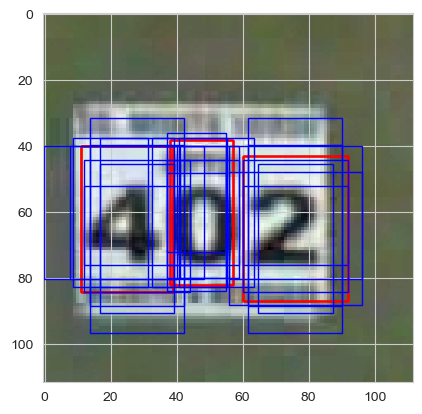

In [57]:
# i, _x = next(iter(itertools.islice(enumerate(svhn.train), 65, 100)))
# x, y = _x['image'][None], tf.concat([_x['bboxes'], tf.cast(_x['classes'][..., None], tf.float32)], axis=-1)[None]
# print(i)
IMG_I = 94
i, (x, y) = next(it)
x = x.numpy()[IMG_I]
y = y.numpy()[IMG_I]
print(np.min(y[..., :4]), np.argmin(y[..., :4]))
y_bbox, y_cls = y[..., :4], y[..., 4]
y_bbox = bboxes_from_fast_rcnn(anchors, y_bbox).numpy()

x = (x - np.min(x, axis=(0, 1))) / (np.max(x, axis=(0, 1)) - np.min(x, axis=(0, 1)))

plt.imshow(x)
# for bbox in y_bbox[y_cls == 1]:
#     plt.gca().add_patch(patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], facecolor=(0,0,0,0), edgecolor='g'))
print(np.unique(y_cls[y_cls >= 2] - 2))
for bbox in y_bbox[y_cls >= 2]:
    plt.gca().add_patch(
        patches.Rectangle((bbox[1], bbox[0]), bbox[3] - bbox[1], bbox[2] - bbox[0], facecolor=(0, 0, 0, 0),
                          edgecolor='r'))
for a in anchors[y_cls >= 2]:
    plt.gca().add_patch(
        patches.Rectangle((a[1], a[0]), a[3] - a[1], a[2] - a[0], facecolor=(0, 0, 0, 0), edgecolor='b'))

plt.show()

In [ ]:
np.sum(cl >= 1), len(cl)

In [ ]:
anchors[cl >= 1]

In [ ]:
bboxes[cl >= 1]